# 8.4 Давай что-то реальное уже:)

In [3]:
from setup_libs import *

In [6]:
import torch, torchvision

In [40]:
from torch import nn, optim

In [4]:
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

In [17]:
from torchvision import datasets, transforms

In [21]:
from torch.utils.data import random_split, DataLoader

## Картинки!

In [22]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)

In [46]:
len(train)

55000

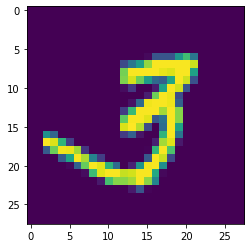

In [37]:
plt.imshow(val[1][0].reshape(28,28).numpy())
plt.show()

In [56]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader:
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1)
        
        y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')
    
    # validation part
    val_losses = list()
    val_count_correct = 0
    for batch in val_loader:
        x, y = batch
        x = x.view(x.size(0), -1)
        
        with torch.no_grad():
            y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        val_losses.append(batch_loss.item())
        val_count_correct += (y_pred.argmax(-1) == y).sum().item()

    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(val_losses).mean()}, Accuracy: {val_count_correct / len(val)}')
    print('------------------------------------')


AttributeError: module 'torch.nn' has no attribute 'View'

# Transforms

# Dropout

# BatchNormalization

# Ссылки интересные
* [MNIST solution](https://www.youtube.com/watch?v=OMDn66kM9Qc)